## Towards A Better Understanding of Typical Learning-to-rank Methods Based on PT-Ranking, Such as RankNet & listnet

## 4 An Empirical Study of RankNet and listnet Based on PT-Ranking

### 4.1 Declare a plot function for visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show_var(list_vals, lbl=None):
    X = np.arange(start=1, stop=len(list_vals)+1).tolist()
    if lbl is not None:
        plt.plot(X, list_vals, label=lbl)
    else:
        plt.plot(X, list_vals)

### 4.2 Specify dataset, output directory, initialize the evaluation object, etc.


In [12]:
import sys
sys.path.append('../')
from ptranking.ltr_adhoc.eval.ltr import LTREvaluator
from ptranking.eval.parameter import DataSetting, EvalSetting, ModelParameter, ScoringFunctionParameter

''' dataset identifier '''
data_id = 'TMDB'

''' directory of the corresponding dataset '''
# dir_data = '/Users/dryuhaitao/WorkBench/Corpus/LETOR4.0/MQ2007/'
# dir_data = '/Users/solar/WorkBench/Datasets/L2R/LETOR4.0/MQ2008/'
dir_data = '.'

''' output directory for results '''
dir_output='output/'
#dir_output = '/Users/solar/WorkBench/CodeBench/PyCharmProject/Project_output/Out_L2R/'

''' the main class for conducting training & testing '''
ltr_evaluator = LTREvaluator()

debug = True # in a debug mode, we just check whether the model can operate

''' using the default setting for loading dataset & using the default setting for evaluation '''
ltr_evaluator.set_eval_setting(debug=debug, dir_output=dir_output)
ltr_evaluator.set_data_setting(debug=debug, data_id=data_id, dir_data=dir_data)
data_dict = ltr_evaluator.get_default_data_setting()
eval_dict = ltr_evaluator.get_default_eval_setting()

NotImplementedError: 

### 4.3 Prepare data

In [3]:
''' load the dataset '''
train_data, test_data, vali_data = ltr_evaluator.load_data(eval_dict=eval_dict, data_dict=data_dict, fold_k=5)

Fold- 5
loading buffered file ...
loading buffered file ...
loading buffered file ...


In [4]:
len(train_data.list_torch_Qs)

168

In [5]:
train_data.list_torch_Qs[1][2].shape

torch.Size([1, 15])

list_torch_Qs is the list of (qid, feature, rank)
feature_dim: [1, num_items, num_features]
label_dim: [1, num_items_num_features]

### 4.3 Configuration of the neural scoring function

In [6]:
''' using the default setting for constructing a neural scoring function '''
ltr_evaluator.set_scoring_function_setting(debug=debug, data_dict=data_dict)
sf_para_dict = ltr_evaluator.get_default_scoring_function_setting()

### 4.4 An example play - RankNet

In [7]:
''' the parameter setting for a model '''
model_id = 'RankNet' # The specified model with default parameters
ltr_evaluator.set_model_setting(debug=debug, model_id=model_id)
model_para_dict = ltr_evaluator.get_default_model_setting()

''' basic check before loading the ranker '''
ltr_evaluator.setup_eval(data_dict=data_dict, eval_dict=eval_dict, sf_para_dict=sf_para_dict, model_para_dict=model_para_dict)

''' initialize the ranker '''
ranknet   = ltr_evaluator.load_ranker(sf_para_dict=sf_para_dict, model_para_dict=model_para_dict)

### 4.5 An example play - listnet

In [8]:
''' the parameter setting for a model '''
model_id = 'ListNet' # The specified model with default parameters
data_dict = ltr_evaluator.get_default_data_setting()
# ltr_evaluator.set_model_setting(debug=debug, model_id=model_id, data_dict=data_dict) # data_dict argument is required
ltr_evaluator.set_model_setting(debug=debug, model_id=model_id) # data_dict argument is required
model_para_dict = ltr_evaluator.get_default_model_setting()
sf_para_dict = ltr_evaluator.get_default_scoring_function_setting()

''' basic check before loading the ranker '''
ltr_evaluator.setup_eval(data_dict=data_dict, eval_dict=eval_dict, sf_para_dict=sf_para_dict, model_para_dict=model_para_dict)

''' initialize the ranker '''
listnet   = ltr_evaluator.load_ranker(sf_para_dict=sf_para_dict, model_para_dict=model_para_dict)

### 4.5.1 Train listnet and Plot

Text(0.5, 1.0, 'listnet')

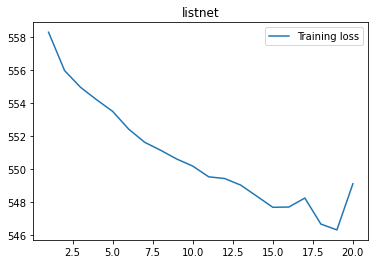

In [9]:
listnet_losses, listnet_train_ndcgs, listnet_test_ndcgs = ltr_evaluator.naive_train(ranker=listnet, eval_dict=eval_dict, train_data=train_data, test_data=test_data)

show_var(listnet_losses, lbl='Training loss') # show the variation of loss
plt.legend()
plt.title('listnet')

Text(0.5, 1.0, 'listnet')

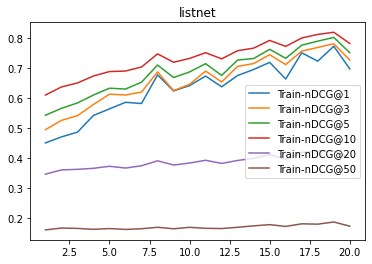

In [10]:
cutoffs = [1, 3, 5, 10, 20, 50]
for i in range(len(cutoffs)):
    k = cutoffs[i]
    show_var(listnet_train_ndcgs[:, i], lbl='Train-nDCG@'+str(k))
plt.legend()
plt.title('listnet')

Text(0.5, 1.0, 'listnet')

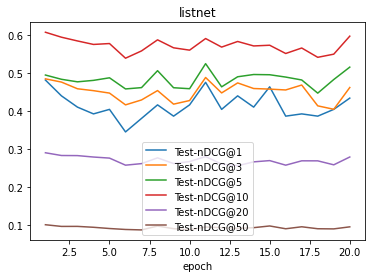

In [11]:
for i in range(len(cutoffs)):
    k = cutoffs[i]
    show_var(listnet_test_ndcgs[:, i], lbl='Test-nDCG@'+str(k))
plt.xlabel('epoch')
plt.legend()
plt.title('listnet')
